In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 15.2 MB/s 
     |████████████████████████████████| 9.5 MB 43.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/Bankniftydata.csv',index_col='Date'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (1366, 6)


,Open,High,Low,Close,(High-Low),(Open-Close)
Date,,,,,,
2016-01-01,16932.50,17067.45,16824.05,17039.25,243.4,-106.75
2016-01-04,16966.35,16966.35,16575.45,16599.15,390.9,367.2
2016-01-05,16652.05,16670.20,16474.85,16542.50,195.35,109.55
2016-01-06,16505.45,16614.95,16377.65,16433.15,237.3,72.3
2016-01-07,16256.55,16256.55,16049.75,16073.85,206.8,182.7
...,...,...,...,...,...,...
2021-07-05,35010.95,35234.30,34926.40,35212.00,307.9,-201.05
2021-07-06,35173.60,35807.45,35165.55,35579.15,641.9,-405.55
2021-07-07,35550.60,35795.75,35427.65,35771.30,368.1,-220.7


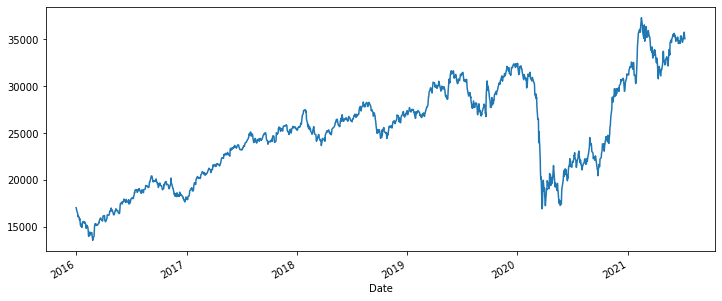

In [ ]:
df['Close'].plot(figsize=(12,5))

In [ ]:
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_axis(df['Date'], inplace=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['Close'])

1. ADF :  -1.46144768192381
2. P-Value :  0.5524891826577587
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1358
5. Critical Values :
	 1% :  -3.4351745242248715
	 5% :  -2.8636706623947417
	 10% :  -2.567904365598721


In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1366
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -10040.436
Date:                Mon, 02 Aug 2021   AIC                          20090.872
Time:                        11:19:20   BIC                          20116.967
Sample:                             0   HQIC                         20100.639
                               - 1366                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0150      0.054     -0.277      0.782      -0.121       0.091
ar.L2         -0.8972      0.043    -20.816      0.000      -0.982      -0.813
ma.L1          0.0537      0.056      0.968      0.333      -0.055       0.163
ma.L2          0.8785      0.048     18.420      0.000       0.785       0.972
sigma2      1.434e+05   2213.221     64.785      0.000    1.39e+05    1.48e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7224.96
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               7.74   Skew:                            -0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1366, 7)
(1336, 7) (30, 7)
Date            2021-05-31 00:00:00
Open                        35097.4
High                        35584.3
Low                         34930.1
Close                       35526.7
(High-Low)                    654.2
(Open-Close)                 -429.2
Name: 2021-05-31 00:00:00, dtype: object Date            2021-07-09 00:00:00
Open                        35163.8
High                        35225.2
Low                         34859.9
Close                       35071.9
(High-Low)                    365.3
(Open-Close)                   91.8
Name: 2021-07-09 00:00:00, dtype: object


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Close'],order=(2,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1335
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9825.314
Method:                       css-mle   S.D. of innovations            380.243
Date:                Mon, 02 Aug 2021   AIC                          19662.628
Time:                        11:19:33   BIC                          19693.808
Sample:                             1   HQIC                         19674.311
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.4753     10.528      1.280      0.201      -7.159      34.110
ar.L1.D.Close    -0.0293      0.055     -0.532      0.595      -0.137       0.079
ar.L2.D.Close    -0.9096      0.059    -15.294      0.000      -1.026      -0.793
ma.L1.D.Close     0.0690      0.057      1.205      0.228      -0.043       0.181
ma.L2.D.Close     0.8925      0.066     13.584      0.000       0.764       1.021
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0161           -1.0484j            1.0485           -0.2524
AR.2           -0.0161           +1.0484j            1.0485            0.2524
MA.1           -0.0386           -1.0578j            1.0585           -0.2558
MA.2           -0.0386           +1.0578j            1.0585            0.2558
-----------------------------------------------------------------------------
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_pred_dates=pd.date_range(start='2016-01-01',end='2021-07-09')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')


In [ ]:
pred

1335    35060.110225
1336    34963.025829
1337    35065.979324
1338    35177.396023
1339    35106.616744
1340    35033.474752
1341    35126.121660
1342    35216.062906
1343    35155.287028
1344    35101.385507
1345    35184.370228
1346    35257.093882
1347    35205.610598
1348    35167.097545
1349    35241.179403
1350    35300.166890
1351    35257.183599
1352    35230.915629
1353    35296.907595
1354    35344.994233
1355    35309.688456
1356    35293.110737
1357    35351.835725
1358    35391.321210
1359    35362.877111
1360    35353.921803
1361    35406.182421
1362    35438.924096
1363    35416.557258
1364    35413.557950
Name: ARIMA predictions, dtype: float64

In [ ]:
pred.index=df.index[start:end+1]

In [ ]:
print(pred)

Date
2021-05-31    35060.110225
2021-06-01    34963.025829
2021-06-02    35065.979324
2021-06-03    35177.396023
2021-06-04    35106.616744
2021-06-07    35033.474752
2021-06-08    35126.121660
2021-06-09    35216.062906
2021-06-10    35155.287028
2021-06-11    35101.385507
2021-06-14    35184.370228
2021-06-15    35257.093882
2021-06-16    35205.610598
2021-06-17    35167.097545
2021-06-18    35241.179403
2021-06-21    35300.166890
2021-06-22    35257.183599
2021-06-23    35230.915629
2021-06-24    35296.907595
2021-06-25    35344.994233
2021-06-28    35309.688456
2021-06-29    35293.110737
2021-06-30    35351.835725
2021-07-01    35391.321210
2021-07-02    35362.877111
2021-07-05    35353.921803
2021-07-06    35406.182421
2021-07-07    35438.924096
2021-07-08    35416.557258
2021-07-09    35413.557950
Name: ARIMA predictions, dtype: float64


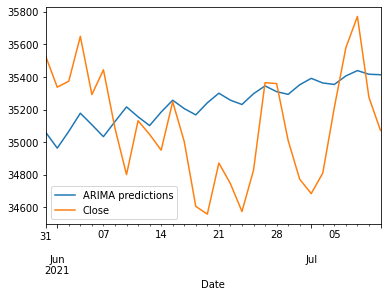

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['Close'].plot(legend=True)

In [ ]:
test['Close'].mean()

35099.26166666667

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Close']))
print(rmse)

389.6151378979243


In [ ]:
model2=ARIMA(df['Close'],order=(2,1,2))
model2=model2.fit()
df.tail()

,Date,Open,High,Low,Close,(High-Low),(Open-Close)
Date,,,,,,,
2021-07-05,2021-07-05,35010.95,35234.30,34926.40,35212.00,307.9,-201.05
2021-07-06,2021-07-06,35173.60,35807.45,35165.55,35579.15,641.9,-405.55
2021-07-07,2021-07-07,35550.60,35795.75,35427.65,35771.30,368.1,-220.7
2021-07-08,2021-07-08,35603.25,35811.00,35134.65,35274.10,676.35,329.15
2021-07-09,2021-07-09,35163.75,35225.20,34859.90,35071.95,365.3,91.8


In [ ]:
index_future_dates=pd.date_range(start='2021-07-09',end='2021-08-08')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2021-07-09    35091.313618
2021-07-10    35159.671329
2021-07-11    35166.595147
2021-07-12    35130.114006
2021-07-13    35149.744853
2021-07-14    35207.805509
2021-07-15    35214.632068
2021-07-16    35187.455464
2021-07-17    35207.043902
2021-07-18    35256.698696
2021-07-19    35263.681268
2021-07-20    35244.097000
2021-07-21    35263.438178
2021-07-22    35306.236917
2021-07-23    35313.538880
2021-07-24    35300.144443
2021-07-25    35319.110389
2021-07-26    35356.321999
2021-07-27    35364.041206
2021-07-28    35355.688781
2021-07-29    35374.207159
2021-07-30    35406.869683
2021-07-31    35415.056953
2021-08-01    35410.807979
2021-08-02    35428.846016
2021-08-03    35457.807883
2021-08-04    35466.480947
2021-08-05    35465.568638
2021-08-06    35483.121050
2021-08-07    35509.075110
2021-08-08    35518.229040
Freq: D, Name: ARIMA Predictions, dtype: float64


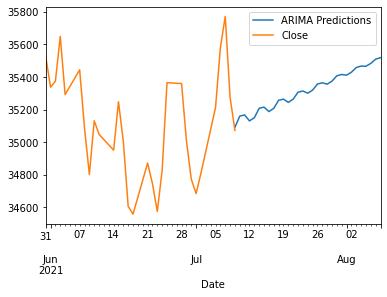

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['Close'].plot(legend=True)

In [ ]:
index_future_dates=pd.date_range(start='2021-07-09',end='2021-07-16')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+7,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2021-07-09    35091.313618
2021-07-10    35159.671329
2021-07-11    35166.595147
2021-07-12    35130.114006
2021-07-13    35149.744853
2021-07-14    35207.805509
2021-07-15    35214.632068
2021-07-16    35187.455464
Freq: D, Name: ARIMA Predictions, dtype: float64


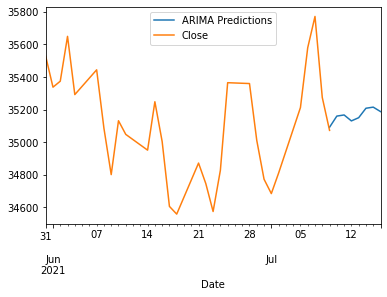

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['Close'].plot(legend=True)

In [ ]:
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
import seaborn as sns

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1298

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.14667239],
       [0.1281423 ],
       [0.12575709],
       ...,
       [0.93537202],
       [0.91443777],
       [0.90592639]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 31:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.14667239, 0.1281423 , 0.12575709, 0.12115298, 0.10602491,
       0.10892169, 0.10359971, 0.09174945, 0.09751985, 0.08648642,
       0.06949734, 0.06168699, 0.07216464, 0.0580955 , 0.06507218,
       0.08176021, 0.08443804, 0.08332018, 0.0768719 , 0.0828065 ,
       0.07405092, 0.06367431, 0.05382402, 0.05530188, 0.06763422,
       0.0627817 , 0.0555524 , 0.0434832 , 0.01990901, 0.01750696])]
[0.03744334341731026]

[array([0.14667239, 0.1281423 , 0.12575709, 0.12115298, 0.10602491,
       0.10892169, 0.10359971, 0.09174945, 0.09751985, 0.08648642,
       0.06949734, 0.06168699, 0.07216464, 0.0580955 , 0.06507218,
       0.08176021, 0.08443804, 0.08332018, 0.0768719 , 0.0828065 ,
       0.07405092, 0.06367431, 0.05382402, 0.05530188, 0.06763422,
       0.0627817 , 0.0555524 , 0.0434832 , 0.01990901, 0.01750696]), array([0.1281423 , 0.12575709, 0.12115298, 0.10602491, 0.10892169,
       0.10359971, 0.09174945, 0.09751985, 0.08648642, 0.06949734,
       0.06168699, 0.07216464, 0.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=21)

Epoch 1/21
1268/1268 [==============================] - 39s 16ms/step - loss: 0.0071
Epoch 2/21
1268/1268 [==============================] - 20s 16ms/step - loss: 0.0013
Epoch 3/21
1268/1268 [==============================] - 20s 16ms/step - loss: 7.4600e-04
Epoch 4/21
1268/1268 [==============================] - 20s 16ms/step - loss: 6.3075e-04
Epoch 5/21
1268/1268 [==============================] - 20s 16ms/step - loss: 5.1382e-04
Epoch 6/21
1268/1268 [==============================] - 20s 16ms/step - loss: 5.3319e-04
Epoch 7/21
1268/1268 [==============================] - 20s 16ms/step - loss: 4.9630e-04
Epoch 8/21
1268/1268 [==============================] - 20s 15ms/step - loss: 6.8950e-04
Epoch 9/21
1268/1268 [==============================] - 20s 15ms/step - loss: 4.6164e-04
Epoch 10/21
1268/1268 [==============================] - 20s 16ms/step - loss: 5.8864e-04
Epoch 11/21
1268/1268 [==============================] - 20s 16ms/step - loss: 4.7967e-04
Epoch 12/21
1268/1268 [====

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

507.25544357875435

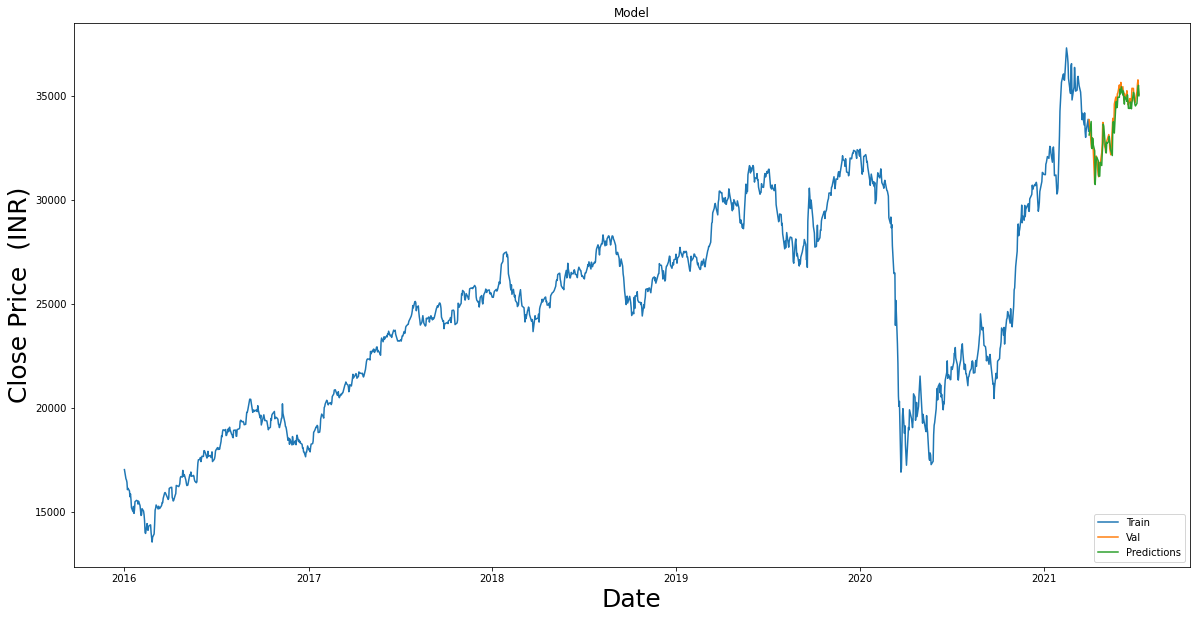

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize=25)
plt.ylabel('Close Price  (INR)', fontsize=25)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-04-01,33858.00,33120.632812
2021-04-05,32678.85,33769.539062
2021-04-06,32501.35,32519.654297
2021-04-07,32991.20,32467.507812
2021-04-08,32782.85,32965.777344
...,...,...
2021-07-05,35212.00,34638.851562
2021-07-06,35579.15,35021.210938
2021-07-07,35771.30,35345.718750


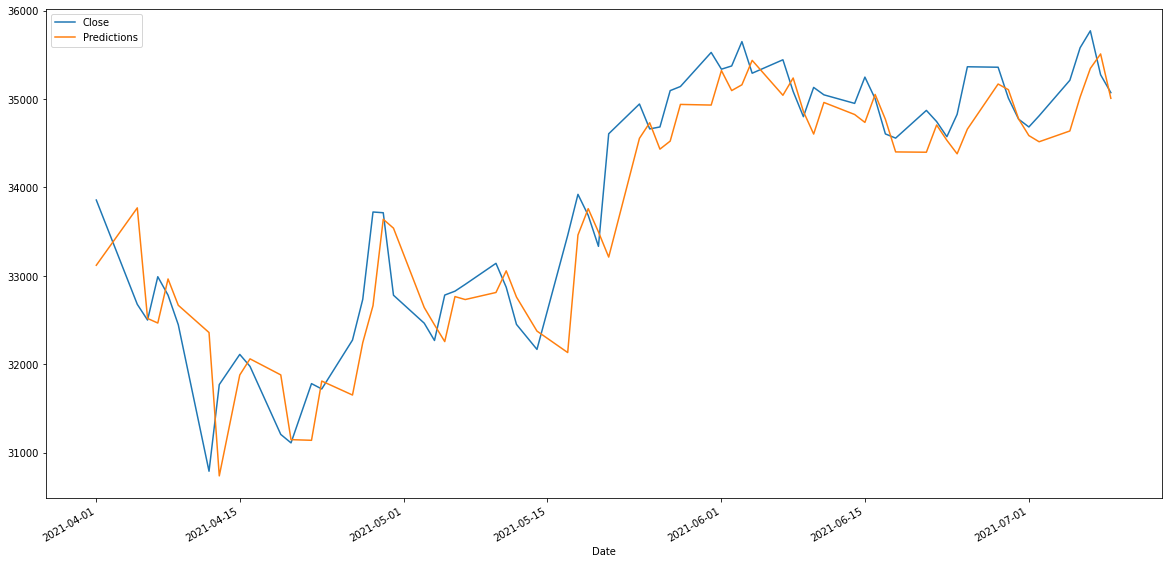

In [ ]:
valid.plot(legend='LSTM Predictions')